# DataLab 2: Voetbal & Data Science <a name='begin'></a>

<br>Groepsnummer: 3B
<br>Sprintnummer: 3 <br><br> Leden:
<br>    **Busse Heemskerk** 22122877 
<br>    **Isa Dijkstra**                             22119485
<br> **Jacco van den Dobbelsteen**  17100976
<br>    **Johan Heskes**                        22132376
<br>    **Tim Oosterling**                        22078800

## Table of Contents

1. [Importeren van de dataset in Python](#dataset)
2. [Sprint 2](#spr2)
    1. [Beschrijven van de tabellen](#tabellen)
    2. [Bekijken van de data van Heracles Almelo](#hadata)
    3. [Eigen functies; Statistieken per seizoen bepalen](#define1)
        1. [Het runnen van de functies](#run1)
3. [Sprint 3](#spr3)
    1. [Eigen functies: Prestaties van Heracles Almelo](#prestatie)
        1. [Bekijken van de prestaties](#prebekijk)
    2. [Eigen functies: Onderzoek teameigenschappen](#team)
        1. [Het aanmaken van de tabel](#kolmaken)
    3. [Eigen functies: Visualisaties voor team statistiek](#visu1)
        1. [Tonen van de grafieken](#run3)
4. [Sprint 4](#spr4)
    1. [Eigen functie: Statistieken per speler](#spelerstat)
    2. [Eigen functies: Speler ratings](#ratingspeler)
    

## Importeren van de dataset in Python <a name='dataset'></a>

Voordat er gecodeerd wordt, worden de mogelijk nodige libraries voor de opdrachten geïmporteerd

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import wraps

Eerst word er een connectie gemaakt met de SQL-database door middel van sqlite3, vervolgens worden de tabellen per stuk geïmporteerd door middel van Pandas.

In [2]:
connect = sqlite3.connect('database.sqlite')

country = pd.read_sql_query("SELECT * FROM Country", connect)
league = pd.read_sql_query("SELECT * FROM League", connect)
match = pd.read_sql_query("SELECT * FROM Match", connect)
player = pd.read_sql_query("SELECT * FROM Player", connect)
player_attributes = pd.read_sql_query("SELECT * FROM Player_attributes", connect)
team = pd.read_sql_query("SELECT * FROM Team", connect)
team_attributes = pd.read_sql_query("SELECT * FROM Team_attributes", connect)

Vervolgens wordt de optie om de kolommen in te korten uitgezet, daarna worden alle kolommen getoont.

In [3]:
pd.set_option("display.max_columns", None)
display(country, league, match, player, player_attributes, team, team_attributes)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,7819,mooi land
5,10257,Italy
6,13274,Netherlands
7,15722,Poland
8,17642,Portugal
9,19694,Scotland


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


[Terug naar het begin](#begin)

# Sprint 2 <a name='spr2' ></a>

## Beschrijven van de tabellen <a name='tabellen'></a>

Hier is de beschrijving van elke tabel gegeven, waarbij de naam en de beschrijving te zien zijn. De beschrijving bevat wat er in de tabel te vinden is.

| Tabel naam | Tabel beschrijving 
|:-------------------|:---------------
Country | In deze tabel staan de namen van de landen en de daarbij horende ID's
League | In deze tabel staan de namen van de competities per land samen met landelijke ID
Match | In deze tabel staat alle informatie die met wedstrijden te maken heeft en informatie over het wedden op de wedstrijden
Player | In deze tabel staat info over alle spelers, hun fifa ID, wanneer ze jarig zijn, hun lengte (in cm) en hun gewicht (in lbs) 
Player_attributes | In deze tabel staan de statistieken en rating van elke speler in de database 
Team | In deze tabel staat de id's van de club, de volledige club naam en de afkorting van de club
Team_attributes | In deze tabel zijn de statistieken van de teams in de database vermeld. zowel offensieve als defensieve statestieken zijn hierbij inbegrepen

[Terug naar het begin](#begin)

## Bekijken van de data van Heracles Almelo <a name='hadata'></a>

Eerst word er een cell gerunt om de team ID te vinden van onze club: Heracles Almelo

In [4]:
team[team["team_long_name"] == "Heracles Almelo"]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
166,26557,9791,100634.0,Heracles Almelo,HER


De gegevens van het gekozen team staan getoond in de uitkomst van de onderstaande cell.

In [5]:
team_id = team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,1]
print('Team ID:', team_id)
print('Name:', team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,3])
print('Short name:', team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,4])
print('Country:', 'Netherlands')
print('League id:', country[country['name'] == 'Netherlands'].iloc[0,0])
print("League name:", league[league["id"] == 13274].iloc[0,2])

Team ID: 9791
Name: Heracles Almelo
Short name: HER
Country: Netherlands
League id: 13274
League name: Netherlands Eredivisie


De gegevens van elke wedstrijd die het gekozen team heeft gespeeld per seizoen is hieronder getoond.

In [6]:
display(match[(match['home_team_api_id'] == team_id) | (match['away_team_api_id'] == team_id)])

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,3,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26663.0,110116.0,26671.0,37965.0,26661.0,26664.0,26648.0,26660.0,26492.0,104045.0,NaN,34489.0,26445.0,34492.0,41462.0,30916.0,24123.0,109638.0,108038.0,30654.0,37173.0,NaN,None,None,None,None,None,None,None,None,4.33,3.25,1.80,3.80,3.40,1.80,3.90,3.3,1.75,3.75,3.3,1.8,NaN,NaN,NaN,4.20,3.40,1.70,4.75,3.50,1.73,4.35,3.40,1.70,4.00,3.40,1.80,4.33,3.30,1.73
13285,13286,13274,13274,2008/2009,10,2008-11-08 00:00:00,523734,9791,8277,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.20,3.40,3.20,2.00,3.30,3.35,2.20,3.2,2.75,2.00,3.2,3.2,NaN,NaN,NaN,2.05,3.40,2.90,2.10,3.40,3.25,2.25,3.30,2.75,2.10,3.25,3.25,2.20,3.30,2.88
13291,13292,13274,13274,2008/2009,11,2008-11-14 00:00:00,523740,9761,9791,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.40,4.50,8.00,1.45,3.75,6.35,1.45,3.8,5.40,1.44,3.6,6.5,NaN,NaN,NaN,1.40,3.75,7.00,1.44,3.75,7.00,1.45,3.80,6.50,1.47,4.00,5.75,1.50,3.75,6.00
13303,13304,13274,13274,2008/2009,12,2008-11-22 00:00:00,523752,8640,9791,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.25,5.50,12.00,1.25,5.00,10.00,1.20,5.0,10.00,1.22,5.0,10.0,NaN,NaN,NaN,1.25,5.00,10.00,1.22,5.50,13.00,1.22,5.00,11.00,1.25,5.00,10.00,1.25,5.00,10.00
13312,13313,13274,13274,2008/2009,13,2008-11-29 00:00:00,523761,9791,8525,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.30,3.25,2.80,2.30,3.35,2.70,2.30,3.2,2.50,2.25,3.4,2.6,NaN,NaN,NaN,2.15,3.30,2.80,2.50,3.25,2.63,2.25,3.40,2.65,2.35,3.30,2.80,2.30,3

[Terug naar het begin](#begin)

## Eigen functies; Statistieken per seizoen bepalen <a name='define1'></a>

Hieronder zijn 4 functies gedefineerd:

    id_zoeker
    punten
    statistiek
    ranglijst
De uitleg van alle functies staat omschreven in de docstrings

### id_zoeker <a name='id_zoeker'></a>

In [7]:
def id_zoeker(club):
    """
    Deze functie haalt het ID-nummer van de gegeven club op
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je het ID wilt weten
    
    Returns
    ----------
    id : integer
        Het ID-nummer van de gekozen club
        
    """
    
    #Filteren
    id = team[team['team_long_name'] == club].iloc[0,1]
    return id

[Terug naar het begin](#begin)

### punten <a name='punten'></a>

In [8]:
def punten(club, seizoen):
    """
    Deze functie maakt, op basis van een club en een seizoen, 2 kolommen aan. Eén over het aantal punten en één over 
    of de wedstrijd thuis of uit was voor het gekozen team.
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je wilt weten hoeveel er gescoord is
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    wed : Pandas DataFrame
        Een dataframe gebaseerd op match, waarbij alleen de data van de aangegeven club en seizoen wordt getoond
    
    """
    
    #Aanmaken van een nieuwe gefilterde dataset
    team_id = id_zoeker(club)
    wed = match[((match['home_team_api_id'] == team_id) | (match['away_team_api_id'] == team_id)) & (match['season'] == seizoen)]
    
    #Beginnen van een list comprehension om de lijsten te vullen
    punten_ = [3 if row['home_team_api_id'] == team_id and row['home_team_goal'] > row['away_team_goal']
           else 1 if row['home_team_api_id'] == team_id and row['home_team_goal'] == row['away_team_goal']
           else 0 if row['home_team_api_id'] == team_id
           else 3 if row['away_team_goal'] > row['home_team_goal']
           else 1 if row['away_team_goal'] == row['home_team_goal']
           else 0 for _, row in wed.iterrows()]

    tu = ['thuis' if row['home_team_api_id'] == team_id else 'uit' for _, row in wed.iterrows()]
        
    #Aanmaken van copy en 2 nieuwe kolommen
    wed = wed.copy()
    wed.loc[:, 'punten'] = punten_
    wed.loc[:, 'thuis / uit'] = tu
    return wed

[Terug naar het begin](#begin)

### statistiek <a name='statistiek'></a>

In [9]:
def statistiek(club, seizoen):
    """
    Deze functie laat de statistieken zien over de gegeven club in het gegeven seizoen. 
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je de statistieken wilt weten
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    df : Pandas DataFrame
        Een dataframe waarin de naam, het aantal wedstrijden, het aantal punten, het gemiddelde aantal punten 
        per wedstrijd en de winst percentages staan
    
    """
    
    #Aanmaken van 2 aparte dataframes voor percentages
    t = punten(club, seizoen)[punten(club, seizoen)['thuis / uit'] == 'thuis']
    u = punten(club, seizoen)[punten(club, seizoen)['thuis / uit'] == 'uit']
    
    #Maken van een list met alle benodigde data voor het dataframe 
    stats = [[club,
            seizoen,
            len(punten(club, seizoen)),
            sum(punten(club, seizoen)['punten']),
            round(sum(punten(club, seizoen)['punten'] / len(punten(club, seizoen)['punten'])), 2),
            round(t[t['punten'] == 3]['punten'].count() / t['punten'].count() * 100, 2),
            round(t[t['punten'] == 1]['punten'].count() / t['punten'].count() * 100, 2),
            round(t[t['punten'] == 0]['punten'].count() / t['punten'].count() * 100, 2),
            round(u[u['punten'] == 3]['punten'].count() / u['punten'].count() * 100, 2),
            round(u[u['punten'] == 1]['punten'].count() / u['punten'].count() * 100, 2),
            round(u[u['punten'] == 0]['punten'].count() / u['punten'].count() * 100, 2)]]
    
    #Maken van het dataframe
    df = pd.DataFrame(stats, columns =['team',
                                       'seizoen',
                                       'wedstrijden', 
                                       'punten',
                                       'gemiddeld_punten',
                                       'thuis_win%',
                                       'thuis_gelijk%',
                                       'thuis_verlies%',
                                       'uit_win%',
                                       'uit_gelijk%',
                                       'uit_verlies%'])
       
    return df

[Terug naar het begin](#begin)

### ranglijst <a name='ranglijst'></a>

In [10]:
load_screen = ["Welcome to this journey!..............................................",    
                       "Preparing to load dataset.............................................",    
                       "Checking for missing files...............................................",    
                       "Initializing data structures................................................",    
                       "Setting up parameters.....................................................",    
                       "Loading feature vectors................................................",    
                       "Applying pre-processing steps......................................",    
                       "Filtering out invalid samples.............................................",    
                       "Compiling statistics.......................................................",    
                       "Normalizing data...........................................................",    
                       "Building training and test sets..........................................",    
                       "Cross-validating models.................................................",   
                       "Fine-tuning hyperparameters..........................................",    
                       "Evaluating performance metrics....................................",    
                       "The dataset is almost loaded!........................................"]

def ranglijst(league_naam, seizoen):
    """
    Deze functie laat de ranglijst zien over de gegeven league in het gegeven seizoen. 
    
    Parameters
    ----------
    league_naam : str 
        De naam van de league waarvan je de ranglijst wilt bepalen
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    df : Pandas DataFrame
        Een dataframe waarin de data van het gegeven seizoen staat op volgorde van de behaalde punten
        
    """
    
    #Filteren voor het maken van een lijst met alle team namen in een league
    league_id = league[league['name']== league_naam].iloc[0,1]
    seizoen_filter = match[match['season'] == seizoen]
    team_ids = set(list(seizoen_filter[seizoen_filter['league_id'] == league_id]['home_team_api_id']))
    team_ids = list(team_ids)
    
    #Maken van een lijst met alle team namen in een league
    team_names = []
    for i in team_ids:
        team_names.append(team[team['team_api_id'] == i].iloc[0,3])
    
    #Aanmaken dataframe voor gebruik    
    df = statistiek(team_names[0],seizoen)

    #Loopen over de list met team namen om het dataframe vol te zetten
    print('stats season', seizoen, 'from', league_naam)
    for i in range(1, len(team_names)):
        df = pd.concat([df, statistiek(team_names[i], seizoen)])
        print(str(round(100/(len(team_names)+1)*i,2))+'%', load_screen[(i-1)%15], end = '\r')
    print('100.0% This adventure was brought to you by Group 3B.........')
    
    #Sorteren van het dataframe op basis van behaalde punten
    df = df.sort_values(by='punten', ascending = False).set_index('team')
    
    return df 

[Terug naar het begin](#begin)

## Het runnen van de functies <a name='run1'></a>
Hieronder worden de functies statistiek en ranglijst uitgevoerd:

In [11]:
statistiek('Heracles Almelo', '2009/2010')

,team,seizoen,wedstrijden,punten,gemiddeld_punten,thuis_win%,thuis_gelijk%,thuis_verlies%,uit_win%,uit_gelijk%,uit_verlies%
0,Heracles Almelo,2009/2010,34,56,1.65,64.71,5.88,29.41,35.29,23.53,41.18


In [12]:
ranglijst('Netherlands Eredivisie', '2009/2010')

stats season 2009/2010 from Netherlands Eredivisie
100.0% This adventure was brought to you by Group 3B...............................Evaluating performance metrics....................................


,seizoen,wedstrijden,punten,gemiddeld_punten,thuis_win%,thuis_gelijk%,thuis_verlies%,uit_win%,uit_gelijk%,uit_verlies%
team,,,,,,,,,,
FC Twente,2009/2010,34,86,2.53,94.12,5.88,0.00,64.71,23.53,11.76
Ajax,2009/2010,34,85,2.50,94.12,5.88,0.00,64.71,17.65,17.65
PSV,2009/2010,34,78,2.29,76.47,23.53,0.00,58.82,29.41,11.76
Feyenoord,2009/2010,34,63,1.85,52.94,35.29,11.76,47.06,35.29,17.65
AZ,2009/2010,34,62,1.82,64.71,11.76,23.53,47.06,17.65,35.29
Heracles Almelo,2009/2010,34,56,1.65,64.71,5.88,29.41,35.29,23.53,41.18
FC Utrecht,2009/2010,34,53,1.56,47.06,41.18,11.76,35.29,23.53,41.18
FC Groningen,2009/2010,34,49,1.44,52.94,17.65,29.41,29.41,23.53,47.06
Roda JC Kerkrade,2009/2010,34,47,1.38,52.94,17.65,29.41,29.41,11.76,58.82


#### Einde Sprint 2

[Terug naar het begin](#begin)

# Sprint 3 <a name='spr3'></a>

Voordat we aan de SQL functies beginnen, word er een decorator gemaakt om queries met SQL code te kunnen lezen.

In [13]:
def sql_lezer(func):
    """
    Een decorator die een functie met een query omzet tot een Pandas DataFrame

    Parameters
    ----------
    func: Python Function
        Een python function die een query bevat

    Returns
    -------
    df : Pandas DataFrame
        Een DataFrame met het resultaat van de query.
    """
    
    @wraps(func)
    def wrapper(*args, **kwargs):
        query = func(*args, **kwargs)
        
        #Aanmaken van try om te proberen de SQL query in te lezen.
        try:
            df = pd.read_sql(query, connect)
            return df
        
        #Aanmaken van except om error's bij het inlezen niet de 'run all' van jupyter te laten stoppen, deze geeft het type melding als tekst weer.
        except Exception as e:
            print(f"Error: {e}")
            return None
        
    return wrapper

[Terug naar het begin](#begin)

## Eigen functies: Prestaties van Heracles Almelo <a name='prestatie'></a>

In de volgende cellen code worden de functies gemaakt om te kijken naar de prestaties van ons team, Heracles Almelo. Eerst wordt er bekeken hoeveel wedstrijden er in elk seizoen zijn gespeeld.

### wedstrijden

In [14]:
@sql_lezer
def wedstrijden(team_id):
    """
    Haalt het aantal gespeelde wedstrijden op van een bepaald team voor elk seizoen.

    Parameters
    ----------
    team_id : int
        Het team ID van het team waarvan het aantal gespeelde wedstrijden wordt opgehaald.

    Returns
    -------
    query : str
        Een SQL-query die het aantal gespeelde wedstrijden door het opgegeven team voor elk seizoen toont, 
        met de kolommen seizoen en Games_played. De query wordt gelezen en veranderd in een dataframe door
        de decorator: sql_lezer.
    """
    
    query = f"""
        SELECT season
                    , COUNT(DISTINCT(match_api_id)) AS Games_played
            FROM match
        
        WHERE (home_team_api_id = {team_id}) OR (away_team_api_id = {team_id})
        
        GROUP BY season
    """
    return query

[Terug naar het begin](#begin)

### wedstrijden_2010

Vervolgens wordt er gekeken naar het aantal gespeelde wedstrijden in het jaar 2010.

In [15]:
@sql_lezer
def wedstrijden_2010(team_id):
    """
    Haalt het aantal gespeelde wedstrijden op van een bepaald team in het jaar 2010.

    Parameters
    ----------
    team_id : int
        Het team ID van het team waarvan het aantal gespeelde wedstrijden wordt opgehaald.

    Returns
    -------
    query : str
        Een SQL-query die het aantal gespeelde wedstrijden door het opgegeven team in het jaar 2010 toont, 
        met de kolommen seizoen en Games_played. De query wordt gelezen en veranderd in een dataframe door
        de decorator: sql_lezer.
    """
    
    query = f"""
        SELECT season
                    , COUNT(DISTINCT(match_api_id)) AS Games_played
            FROM match
        
        WHERE ((home_team_api_id = {team_id}) OR (away_team_api_id = {team_id})) 
        And (date BETWEEN '2010-01-01 00:00:00' AND '2010-12-31 00:00:00' )
        
        GROUP BY season

    """
    return query

[Terug naar het begin](#begin)

### maak_tabel

Hieronder wordt er een tabel aangemaakt om bij de volgende opgaven te gebruiken. Deze tabel wordt gebruikt om het aantal punten per seizoen per competitie te tonen.

In [16]:
@sql_lezer
def maak_tabel(league_id):
    """
    Haalt de punten op van elk team per seizoen in de opgegeven competitie. Deze waarden worden vervolgens in een nieuwe tabel gezet.

    Parameters
    ----------
    league_id : int
        Het ID van de competitie waarvan de punten van elk team per seizoen worden opgehaald, ook wordt de plaats in de competities getoond.

    Returns
    -------
     query : str
        Een SQL-query die de punten van elk team per seizoen in de opgegeven competitie toont,
        met de kolommen league_id, season, Team_ID, Home_Points, Away_Points, Total_Points en Rank.
        De resultaten zijn gesorteerd op seizoen en totale punten in aflopende volgorde. De query wordt gelezen
        en toegepast door de decorator: sql_lezer.
    """
    
    query = f""" 
        CREATE TEMP TABLE pps_{league_id} AS
        SELECT h.league_id
                    , h.season
                    , h.Team_ID AS team_api_id
                    , h.Points AS punten_thuis
                    , a.Points AS punten_uit
                    , (h.Points + a.Points) AS punten_totaal
                    , ROW_NUMBER() OVER (PARTITION BY h.season ORDER BY (h.Points + a.Points) DESC) AS rang_seizoen
                
            FROM (SELECT league_id
                                    , season
                                    , home_team_api_id AS Team_ID
                                    , SUM(CASE WHEN (home_team_goal > away_team_goal) THEN 3
                                                          WHEN (home_team_goal = away_team_goal) THEN 1
                                                          WHEN (home_team_goal < away_team_goal) THEN 0
                                                          END) AS Points
                            FROM match
                            WHERE league_id = {league_id}
                            GROUP BY season
                                            , Team_ID) AS h
                        
        JOIN (SELECT league_id
                                , season
                                , away_team_api_id AS Team_ID
                                , SUM(CASE WHEN (away_team_goal > home_team_goal) THEN 3
                                                      WHEN (away_team_goal = home_team_goal) THEN 1
                                                      WHEN (away_team_goal < home_team_goal) THEN 0
                                                      END) AS Points
                    FROM match
                    WHERE league_id = {league_id}
                    GROUP BY season
                                    , Team_ID) AS a 
            ON h.season = a.season AND h.Team_ID = a.Team_ID
                    
        ORDER BY h.season, punten_totaal DESC;
    """
    return query.strip()

[Terug naar het begin](#begin)

### punten_per_seizoen

Nu wordt de functie punten_per_seizoen aangemaakt, die de aangemaakte tabel toont.

In [17]:
@sql_lezer 
def punten_per_seizoen(league_id):
    """
    Deze functie toont de tabel met het league_id waarmee de punten tabel is aangemaakt
    
    Parameters
    ----------
    league_id : int
        Het ID van de competitie waarvan de tabel die is aangemaakt met maak_tabel() is aangemaakt.

    Returns
    ---------
     query : str
        Een SQL-query die is gemaakt met maak_tabel(). Deze bevat de volgende kolommen:
        league_id, season, Team_ID, Home_Points, Away_Points, Total_Points en Rank.
        De query wordt gelezen en veranderd in een dataframe door de decorator: sql_lezer.
    
    """
    
    query = f"""
        SELECT *
            FROM pps_{league_id}
    """
    return query

[Terug naar het begin](#begin)

### plaats_team

Als laatste wordt in de competitie gekeken naar plaats van Heracles Almelo per seizoen.

In [18]:
@sql_lezer
def plaats_team(league_id, team_id):
    """
    Deze functie toont de tabel met het league_id waarmee de punten tabel is aangemaakt, deze is gefilterd op het aangegeven team_id.
    
    Parameters
    ----------
    league_id : int
        Het ID van de competitie waarvan de tabel die is aangemaakt met maak_tabel() is aangemaakt.

    Returns
    ---------
     query : str
        Een SQL-query die is gemaakt met maak_tabel(), gefilterd op het gegeven team_id. 
        Deze bevat de volgende kolommen: league_id, season, Team_ID, Home_Points, Away_Points, Total_Points en Rank.
        De query wordt gelezen en veranderd in een dataframe door de decorator: sql_lezer.
    """
    
    query = f"""
    SELECT *
        FROM pps_{league_id}
        
        WHERE team_api_id = {team_id}
    """
    return query

[Terug naar het begin](#begin)

## Bekijken van de prestaties <a name='prebekijk'></a>

In de onderstaande cellen zijn de resultaten in een cluster bij elkaar te vinden, de resultaten zijn afkomend van de vorige 5 eigen functies. Hierbij is voor het maken van de tabel pandas gebruikt en voor het selecteren word SQL gebruikt.

In [19]:
wedstrijden(9791)

,season,Games_played
0,2008/2009,34
1,2009/2010,34
2,2010/2011,34
3,2011/2012,34
4,2012/2013,34
5,2013/2014,34
6,2014/2015,34
7,2015/2016,34


In [20]:
wedstrijden_2010(9791)

,season,Games_played
0,2009/2010,16
1,2010/2011,18


In [21]:
maak_tabel(13274)

Error: 'NoneType' object is not iterable


De functie maak_tabel geeft als het goed is een Error 'NoneType' object op. Dit komt omdat de decorator nodig was om de functie te laten werken. Echter kan de decorator geen dataframe aanmaken doordat er een tabel wordt aangemaakt om te kunnen gebruiken voor de volgende twee functies.

In [22]:
punten_per_seizoen(13274)

,league_id,season,team_api_id,punten_thuis,punten_uit,punten_totaal,rang_seizoen
0,13274,2008/2009,10229,43,37,80,1
1,13274,2008/2009,8611,40,29,69,2
2,13274,2008/2009,8593,42,26,68,3
3,13274,2008/2009,8640,37,28,65,4
4,13274,2008/2009,10228,38,22,60,5
...,...,...,...,...,...,...,...
139,13274,2015/2016,9803,15,19,34,14
140,13274,2015/2016,10218,17,13,30,15
141,13274,2015/2016,8525,15,14,29,16
142,13274,2015/2016,8526,15,8,23,17


In [23]:
plaats_team(13274, 9791)

,league_id,season,team_api_id,punten_thuis,punten_uit,punten_totaal,rang_seizoen
0,13274,2008/2009,9791,25,7,32,14
1,13274,2009/2010,9791,34,22,56,6
2,13274,2010/2011,9791,37,12,49,8
3,13274,2011/2012,9791,25,15,40,12
4,13274,2012/2013,9791,24,14,38,13
5,13274,2013/2014,9791,17,20,37,14
6,13274,2014/2015,9791,19,18,37,13
7,13274,2015/2016,9791,32,19,51,6


[Terug naar het begin](#begin)

## Eigen functies: Onderzoek teameigenschappen <a name='team'></a>

Nu is het tijd om te kijken naar welke impact verschillende teameigenschappen hebben voor het hoger scoren van punten. Hiervoor worden er eerst wat DataFrames aangepast en aangemaakt.

### kolom_seizoen

Voordat er begonnen wordt met het onderzoek word er, met behulp van een eigen functie, een kolom aangemaakt om twee dataframes te kunnen mergen.

In [24]:
def kolom_seizoen(df, col):
    """
    Geeft een lijst van seizoenen terug op basis van de maanden in een kolom van een pandas DataFrame.

    Parameters:
    -----------------
    df: Pandas DataFrame
        Het DataFrame waaruit de maanden worden gehaald
        
    col: str
        De naam van de kolom waaruit de maanden worden gehaald

    Returns:
    ------------
    season_list: list
        Een lijst van seizoenen in de vorm 'jaar/jaar', waarbij het jaar eindigt in juli.
    """
    
    #Aanmaken van een lege lijst om te gaan vullen 
    season_list = []
    
    #For-loop om de maanden om te zetten in seizoenen.
    for datum in df[col]:
        maand = datum[5:7]
        maand = int(maand)
        if maand > 7:
            season_list.append(datum[0:4] + '/' + str(int(datum[0:4]) + 1))
        else:
            season_list.append(str(int(datum[0:4]) - 1) + '/' + datum[0:4])
    
    return season_list

team_attributes['season'] = kolom_seizoen(team_attributes, 'date') 

### df_punten

Nu wordt er een dataframe gemaakt waarbij het aantal behaalde punten per team (van elke competitie) per seizoen getoond wordt.

In [25]:
def df_punten(df, seizoen):
    """
    Maakt het dataframe df_punten aan voor een merge. Hierin bevinden zich de kolommen: season, team_api_id en punten.

    Parameters:
    -----------------
    df: pandas.DataFrame
        Het pandas dataframe dat je wilt gebruiken
    
    seizoen : str
        De jaartallen van het seizoen die bekeken wordt.

    Returns:
    ------------
    df_punten : Pandas DataFrame
        Een pandas DataFrame waarin het aangegeven seizoen, het team_id van de teams en het aantal behaalde punten staan.
    """
        
    #Zorgen dat het juiste seizoen wordt gekozen
    match_temp = df[df['season'] == seizoen].reset_index(drop=True)
    
    #Maak 2 lijsten voor de behaalde thuis en uit punten
    home_points = [3 if h > a else 1 if h == a else 0 for h, a in zip(match_temp['home_team_goal'], match_temp['away_team_goal'])]
    away_points = [3 if a > h else 1 if a == h else 0 for h, a in zip(match_temp['home_team_goal'], match_temp['away_team_goal'])]
    
    #Maak een lijst met daarin alle data die nodig is voor bij de merge (De ' \ ' is om door te gaan op de volgende regel)
    data = [[match_temp['season'][i], match_temp['home_team_api_id'][i], home_points[i]] for i in range(len(match_temp))] + \
               [[match_temp['season'][i], match_temp['away_team_api_id'][i], away_points[i]] for i in range(len(match_temp))]
    
    #Maken van de dataframe df_points
    df_punten = pd.DataFrame(data, columns=['season','team_api_id','punten'])

    #Groepeer op seizoen en team_id om de punten op te tellen
    df_punten = df_punten.groupby(['season','team_api_id']).sum().reset_index()
    
    return df_punten

### get_name

Met deze functie kan er van elke kolom die een team_api_id bevat een naam gevonden worden, zolang deze naam in de team dataframe te vinden is.

In [ ]:
def get_name(df, col): 
    """
    Zoekt de team namen bij een behorende team ID in de aangegeven kolommen

    Parameters:
    -----------------
        df : pandas.DataFrame
            Het betreffende dataframe waar je de functie op uitvoert
            
        col : str
            De kolomnaam met de team_api_id's
            
    Returns:
    ---------------
        long_names : list 
            Een lijst met de namen van de teams, afhankelijk van de id's
    """
    
    long_names = [(team[team['team_api_id']==i].iloc[0,3]) for i in df[col]]
    return long_names

## Het aanmaken van de tabel <a name='kolmaken'></a>

In de onderstaande cel zal het dataframe team_attributes_points aangemaakt worden. Ook zal er een kolom met de volledige teamnaam worden aangemaakt.

In [1]:
#merge team_attributes en df_points
team_attributes_points = pd.merge(team_attributes, df_punten(match, '2009/2010'), on=['team_api_id', 'season'])

#pakt de team namen erbij
team_attributes_points['long_name'] = get_name(team_attributes_points,'team_api_id')

#door index te maken en weer wegtehalen worden de kolommen voor aan gezet
team_attributes_points = team_attributes_points.set_index(['long_name','season','punten']).reset_index(drop=False)

#verwijderen kolommen die te veel NaN-waardes hebben of nauwelijks invloed hebben op performance.
#De team_api_id en season kolommen zijn nog aanwezig om de date overzichtelijker te houden, deze hebben nauwelijks invloed op performance.
team_attributes_points = team_attributes_points.drop(['buildUpPlayDribbling', 'id', 'team_fifa_api_id', 'date'],axis=1)

display(team_attributes_points)

NameError: name 'pd' is not defined

[Terug naar het begin](#begin)

## Eigen functies: Visualisaties voor team statistiek <a name='visu1'></a>

Voor de visualisaties wordt er gezocht naar correlatie tussen het puntenaantal en de teameigenschappen. Eerst worden de functies gemaakt en vervolgens zullen deze functies aangeroepen worden.

### heatmap

Het maken van de heatmap geeft een duidelijk overzicht van de verschillende kolommen met numerieke variablen.

In [27]:
def heatmap(kolommen, corrnaam, df):
    """
    Deze functie maakt een heatmap aan, gebaseerd op een lijst aan kolommen en een gegeven dataframe
    
    Parameters:
    ---------------
    kolommen : list[str]
        Een lijst met numerieke kolommen waarvoor de correlatie tot 'corrnaam' wordt uitgerekend.
    
    corrnaam : str
        De naam van de kolom waarmee de lijst van kolommen wordt gecorreleerd
        
    df : Pandas DataFrame
        Het DataFrame waar de eerder vernoemde kolommen instaan
        
    Returns:
    ---------------
    None
        Er wordt geen waarde gereturned. Er word een plot gemaakt van de correlatie in vorm van een heatmap.
    """
    
    #Maken van een nieuw dataframe met de gewilde kolommen
    corr = df[kolommen + [corrnaam]]

    #Maken van correlatie df
    corr_hm = corr.corr()
    corr_hm_col = corr_hm[corrnaam]
    corr_hm_fini = corr_hm_col.drop(corrnaam)

    #Plotten van de grafiek
    sns.heatmap(pd.DataFrame(corr_hm_fini.sort_values(ascending=False)), cmap='coolwarm', annot=True)
    return plt.show()

### scatterplots

De scatterplots zijn er om de correlatie nogmaals in beeld te brengen, echter laten de scatterplots het ook nog toe om de categoriale variablen te tonen.

In [28]:
#Maken van scatterplots voor elke kolom, t.o.v. de punten kolom
def scatterplots(df, kolom):
    """
    Maakt een aantal scatter plots gelijk aan het aantal kolommen in de Dataframe. De scatterplots zijn tegen één specifieke kolom opgezet, om de 
    correlatie te visualiseren.
    
    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je de correlaties wilt onderzoeken.
    
    kolom : str
        De naam van de kolom waarmee de correlatie berekend word, ten opzichte van de andere kolommen.
        
    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de functie meerdere scatterplots zien.
    """    
    #For-loop om elke kolom een eigen scatterplot te geven
    for col in df.columns:
        #if-statement om te voorkomen dat de parameter kolom ook een scatterplot krijgt
        if col != kolom:
            #Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))
            
            #Maken en benoemen van de assen van een scatterplot
            plt.scatter(df[col], df[kolom])
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()

### boxplots

Als laatste word er gekeken via boxplots. Boxplots tonen de verdeling van de variablen, waardoor er duidelijker kan worden gekeken naar de variablen. Deze verdeling kan laten zien of er misschien optimale niveau's van aanvals of verdedigings statistieken zijn, in plaats van dat er naar de correlatie wordt gekeken.

In [29]:
def boxplots(df, kolom):
    """
    Maakt een aantal box plots gelijk aan het aantal kolommen in de Dataframe. De box zijn tegen één specifieke kolom opgezet, om de 
    verdeling t.o.v. die kolom te tonen.
    
    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je de verdeling wilt onderzoeken.
    
    kolom : str
        De naam van de kolom waarbij de verdeling bekeken word, ten opzichte van de andere kolommen.
        
    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de functie meerdere boxplots zien.
    """    
    #For-loop om elke kolom een eigen boxplot te geven
    for col in df.columns:
        #if-statement om te voorkomen dat de kolom-parameter ook een boxplot krijgt
        if col != kolom:
            #Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))
            
            #Maken en benoemen van de assen van de boxplots
            sns.boxplot(x=col, y=kolom, data=df, color= 'skyblue')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()

## Tonen van de grafieken <a name='run3'></a>

Hieronder tonen we van elke functie de resulterende grafieken. Ook word er een nieuw df en een list aangemaakt om deze te gebruiken voor de visualisaties.

In [30]:
#Relevante kolommen met de hand kiezen voor correlatie (numerieke kolommen), kolommen met te veel missende waardes zijn ook weggelaten.
kolom_num = ['buildUpPlaySpeed', 'buildUpPlayPassing',
                   'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
                   'defencePressure', 'defenceAggression', 'defenceTeamWidth']

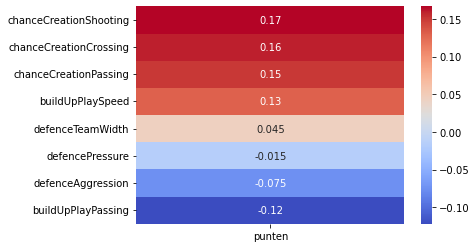

In [31]:
heatmap(kolom_num, 'punten', team_attributes_points)

Bij de heatmap valt er te zien dat de correlaties niet erg hoog zijn, door de scatterplots en boxplots wordt er gehoopt om een beter begrip te krijgen over welke waardes impact hebben op het aantal gescoorde punten.

In [32]:
#Weghalen van bepaalde kolommen die geen impact hebben op het aantal punten
tap = team_attributes_points.copy()
tap = tap.drop(['long_name', 'season', 'team_api_id'], axis = 1)

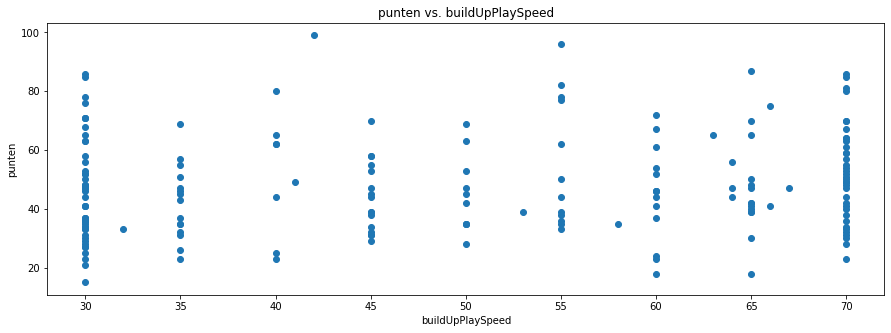

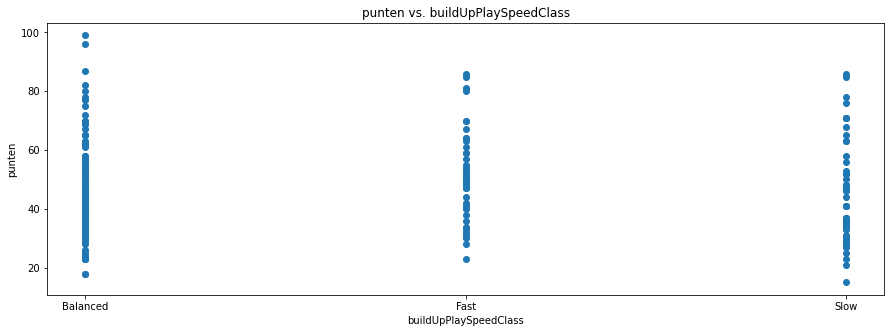

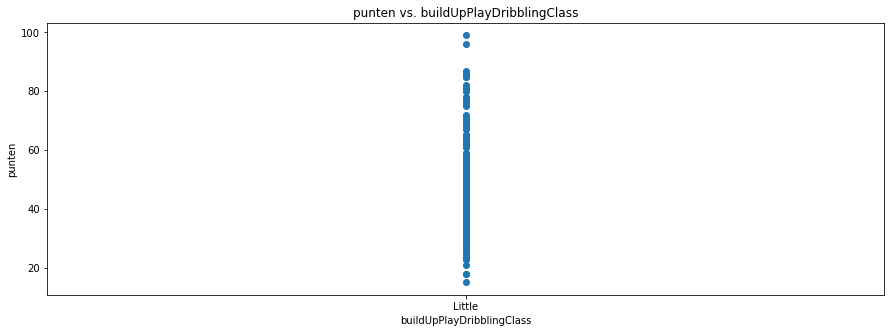

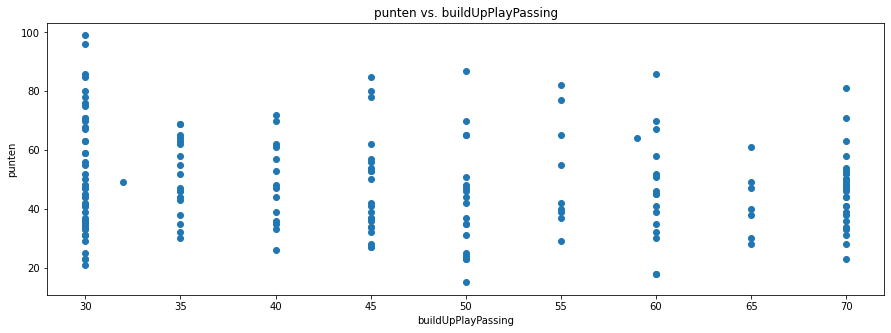

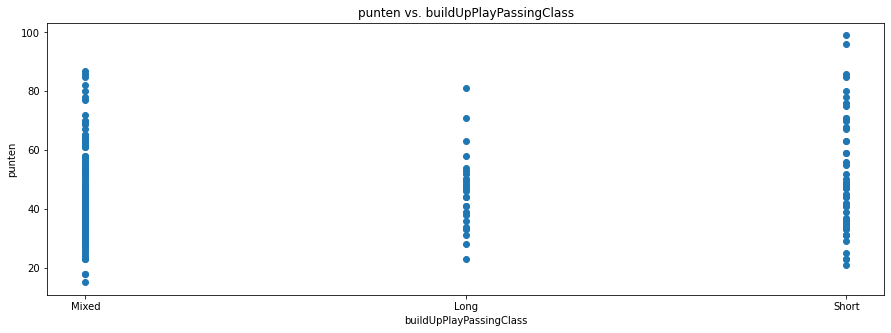

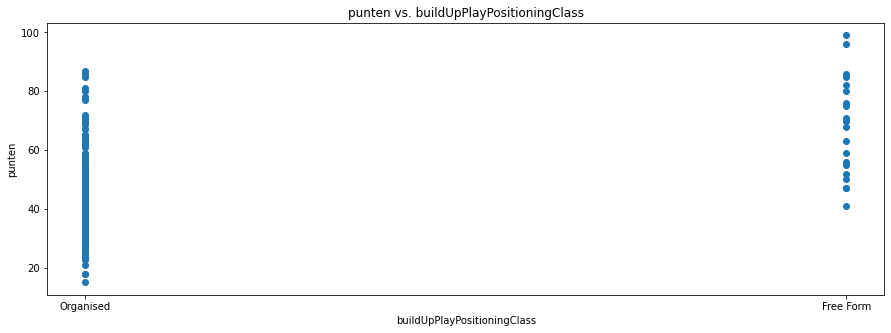

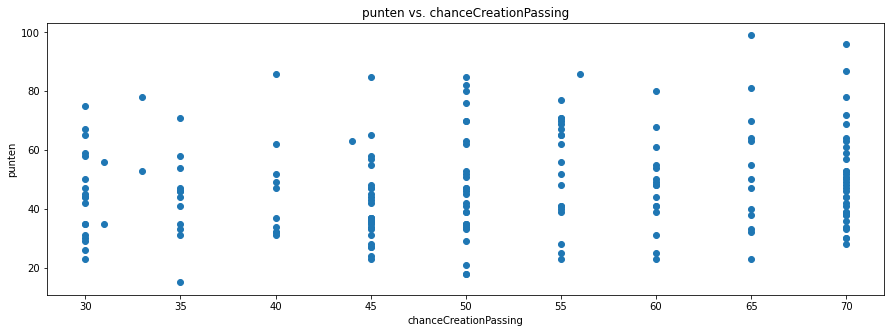

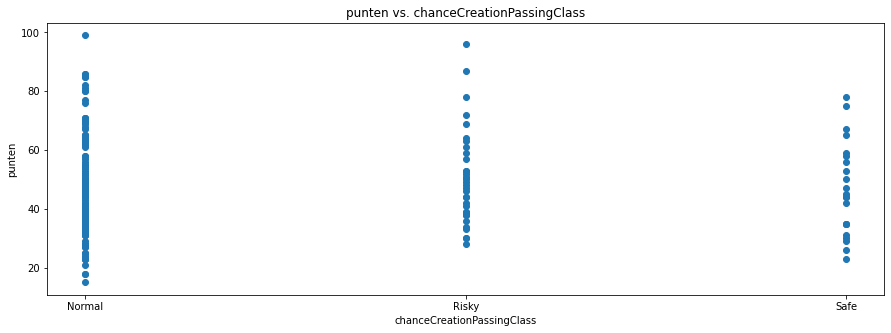

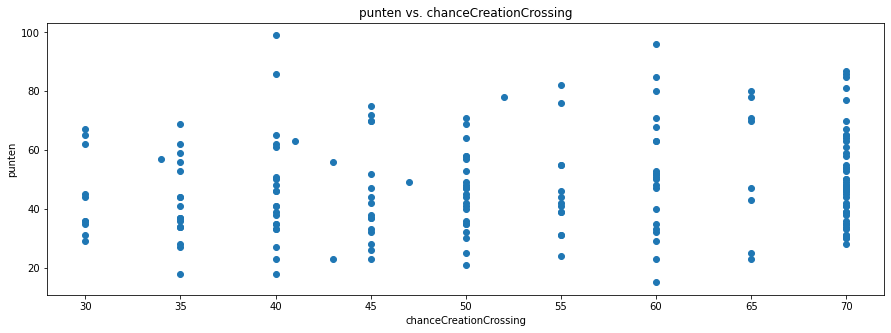

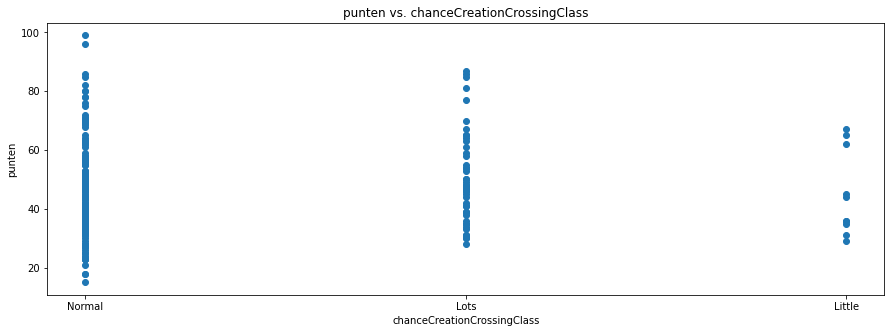

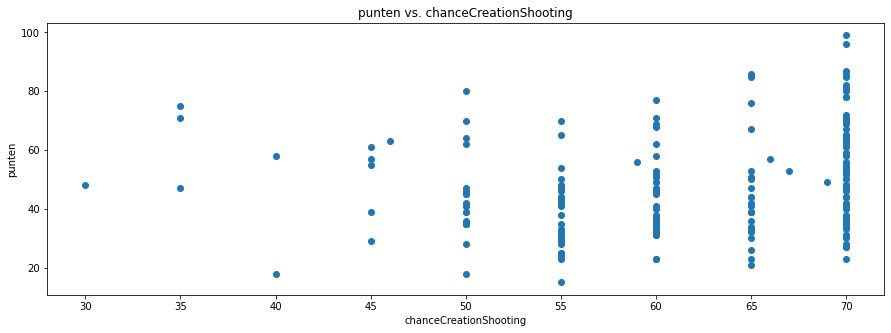

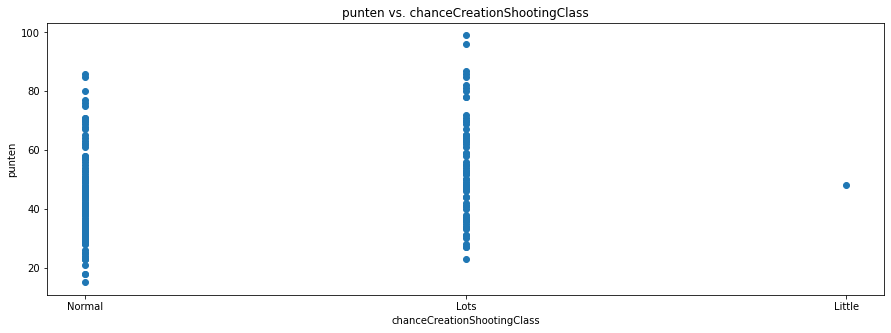

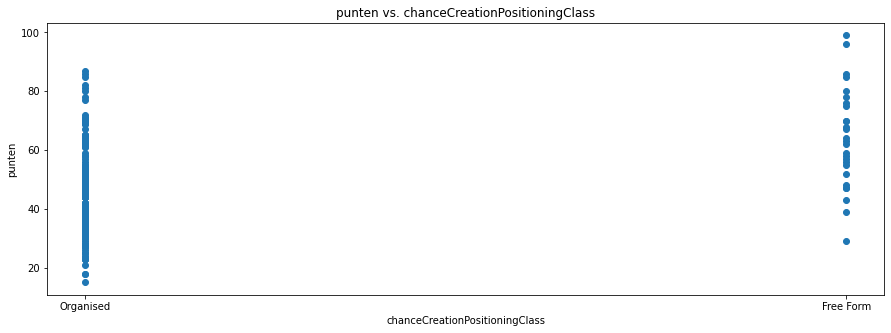

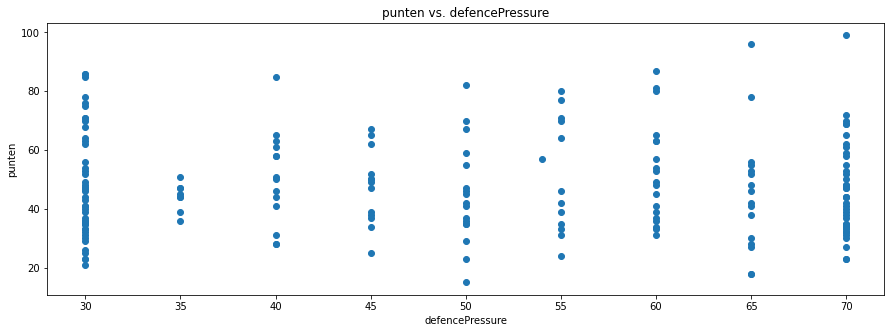

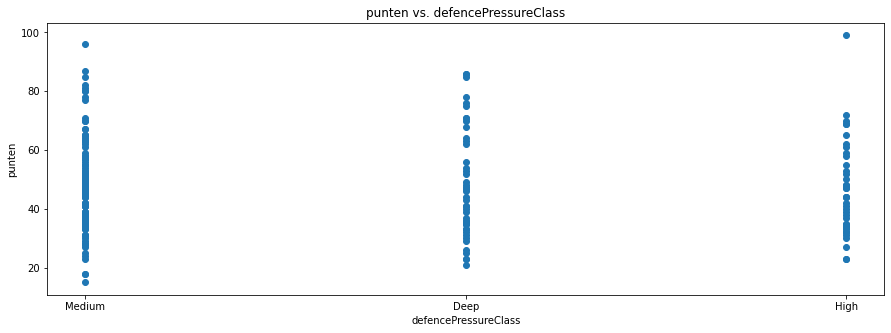

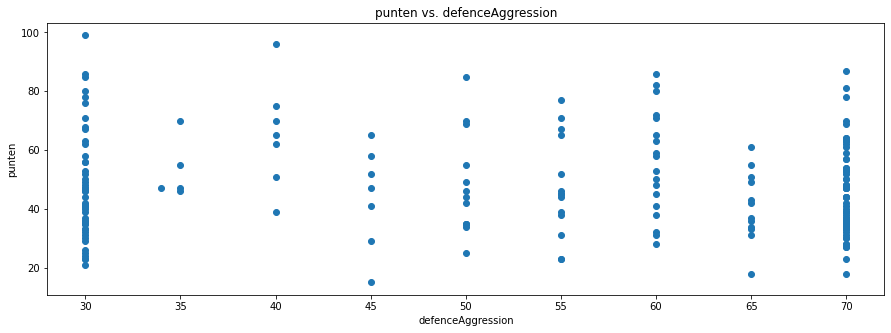

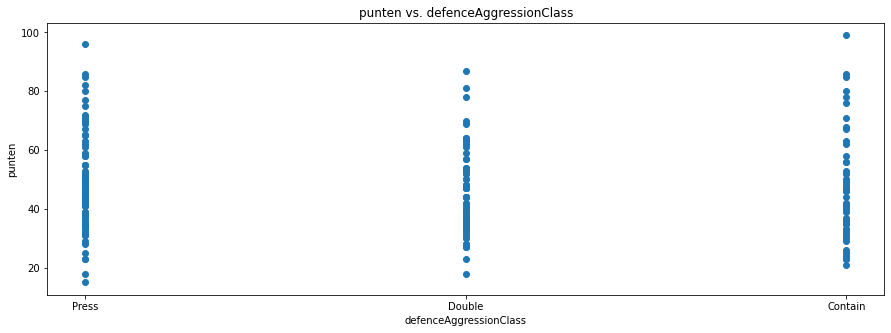

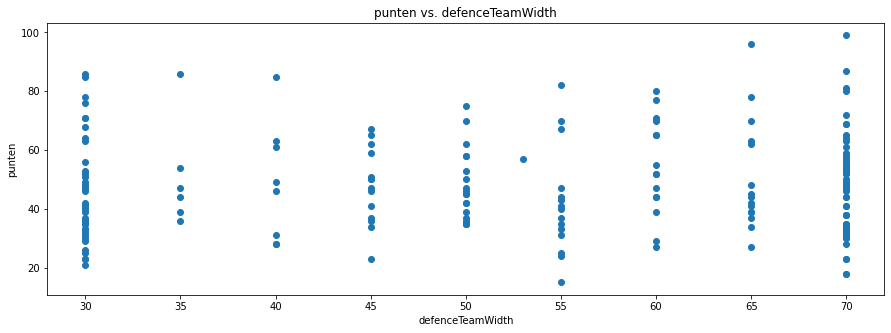

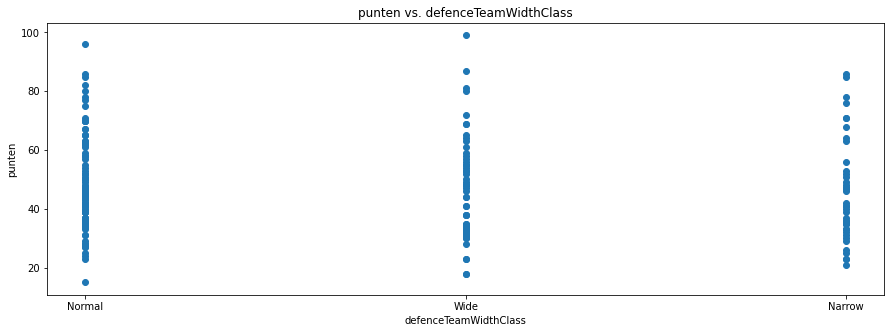

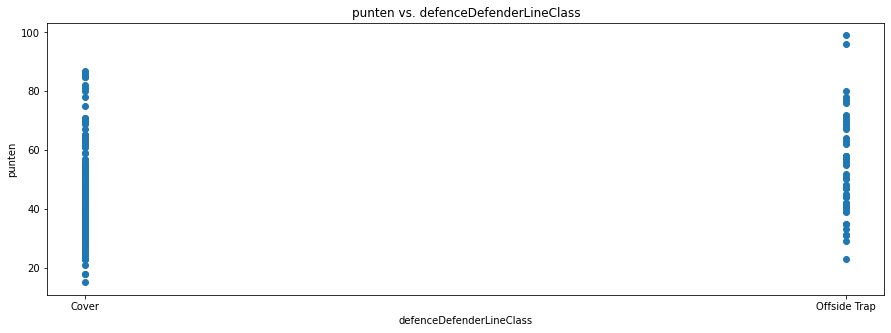

In [33]:
scatterplots(tap, 'punten')

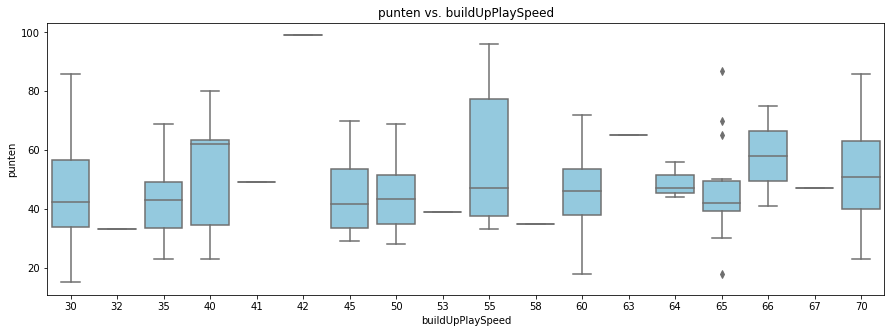

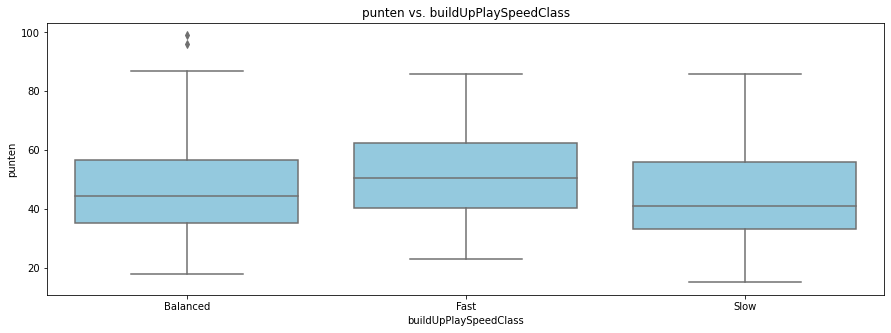

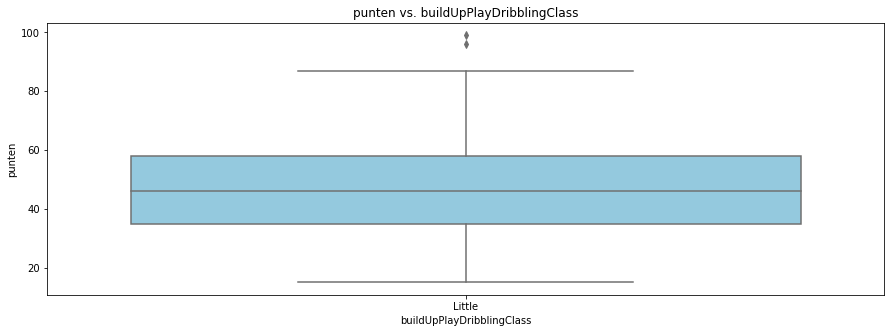

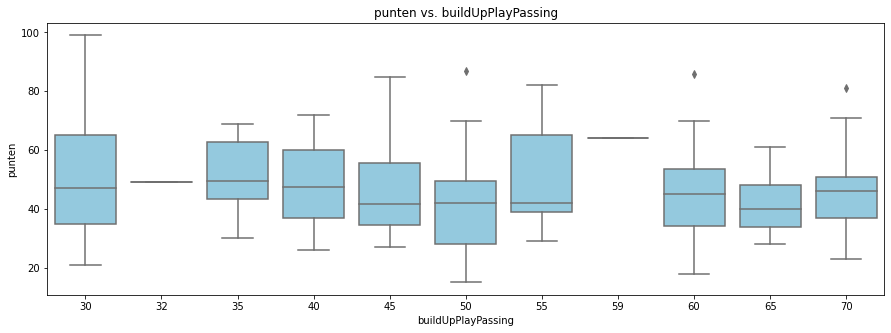

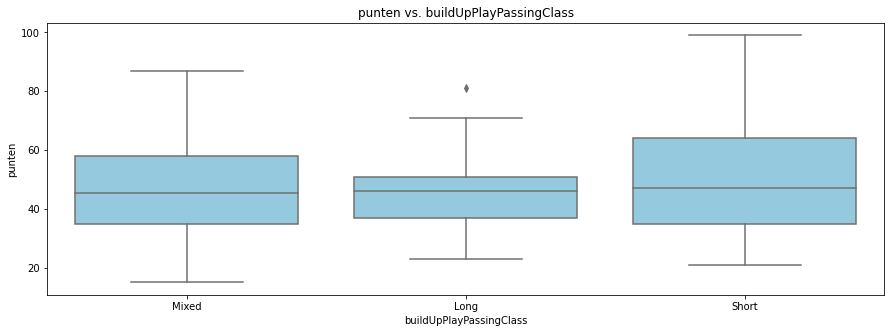

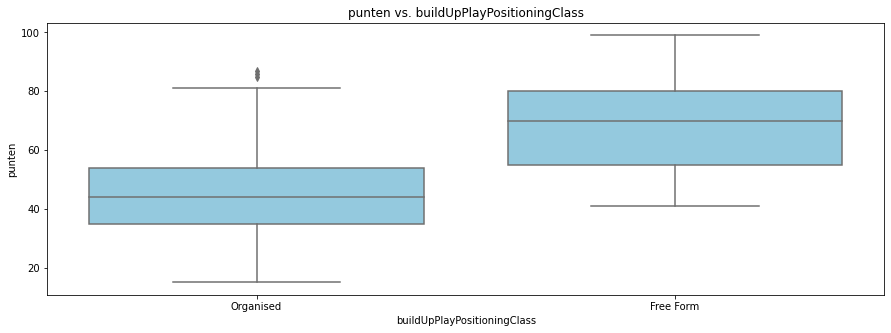

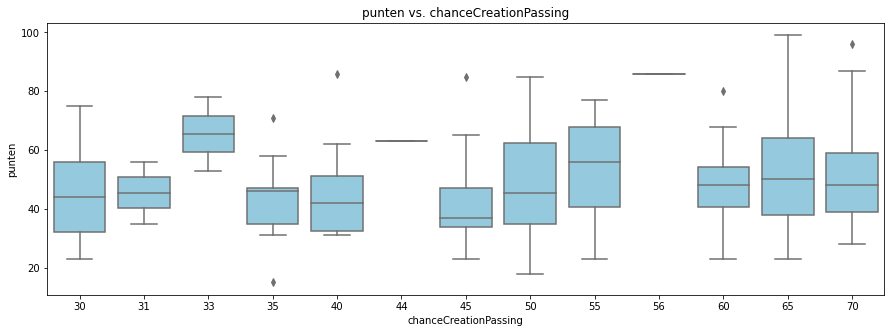

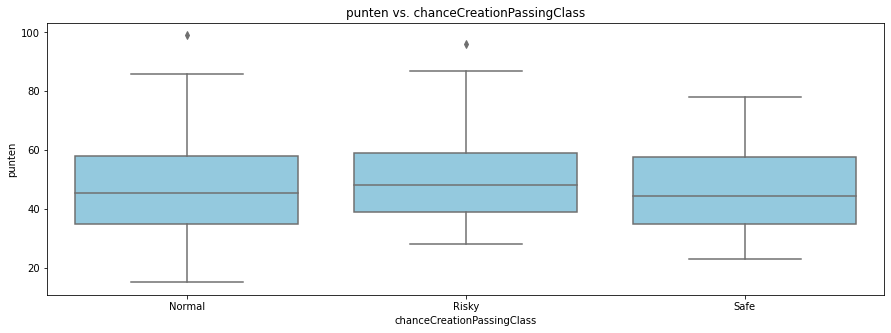

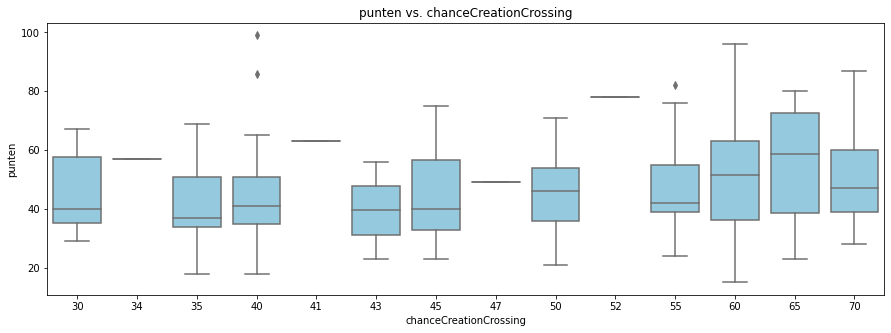

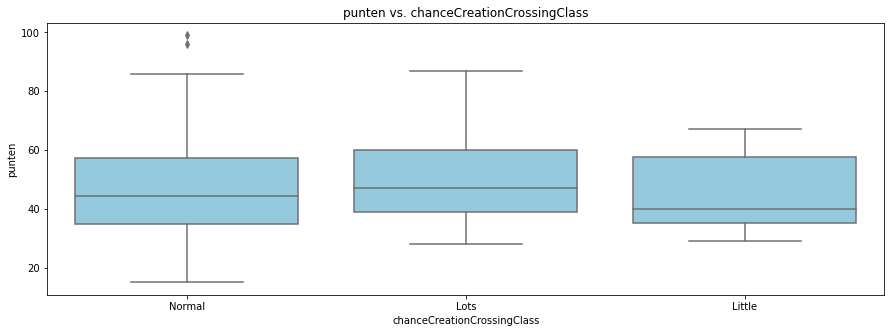

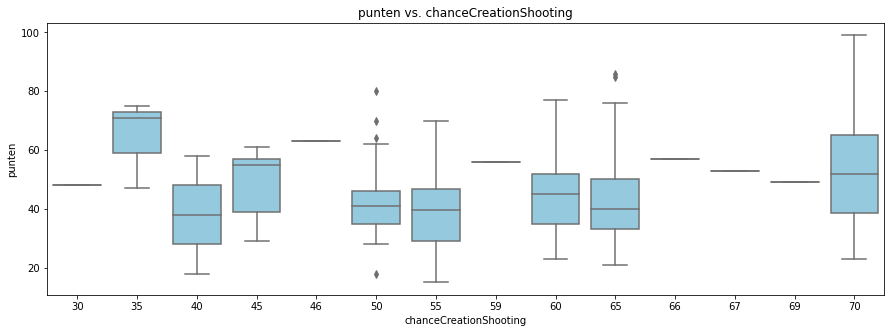

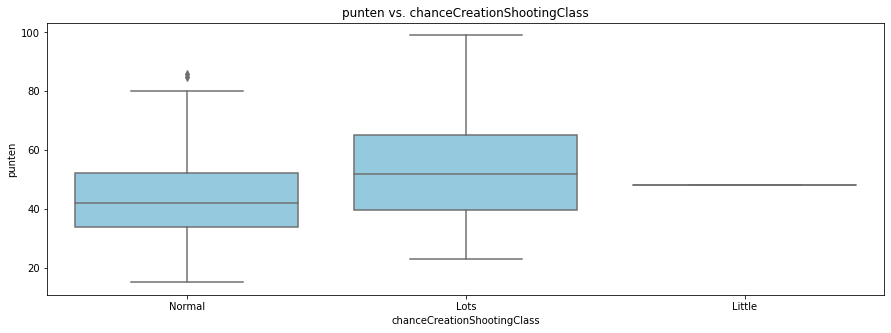

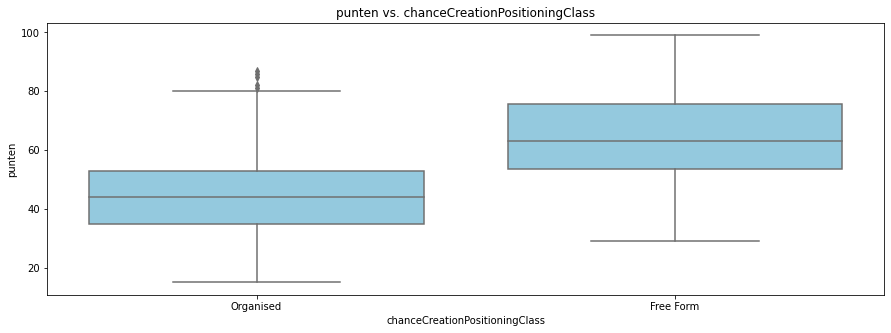

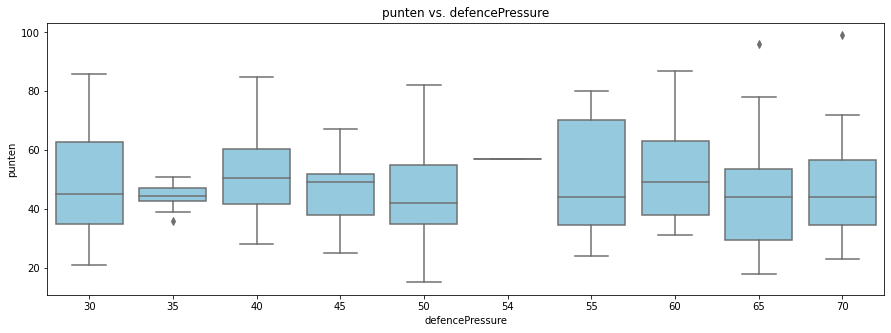

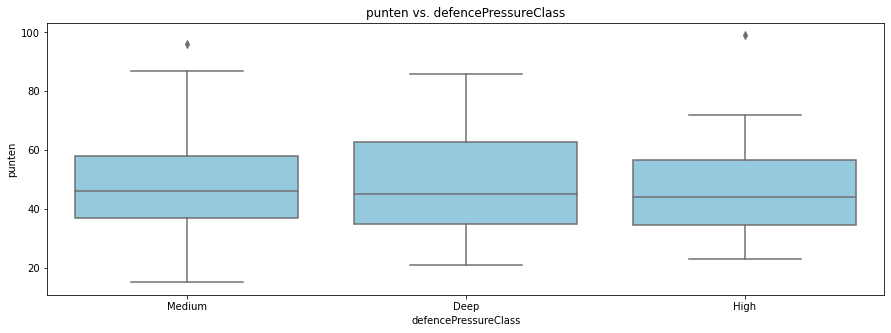

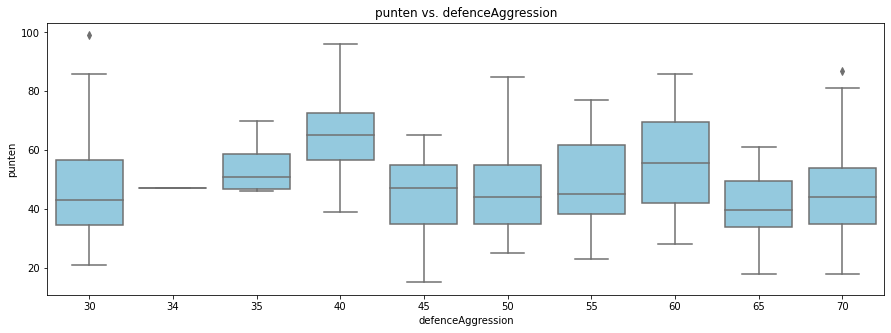

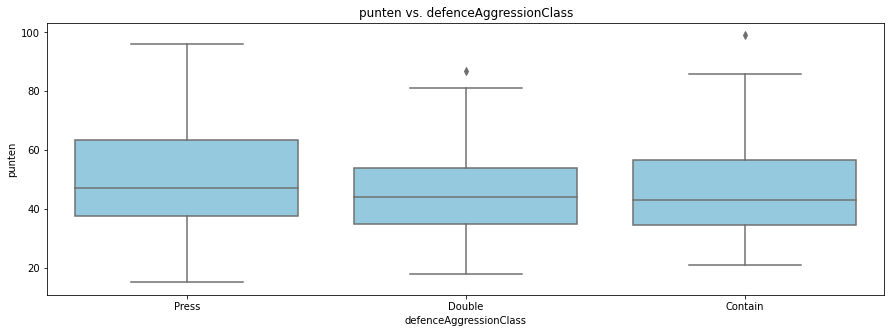

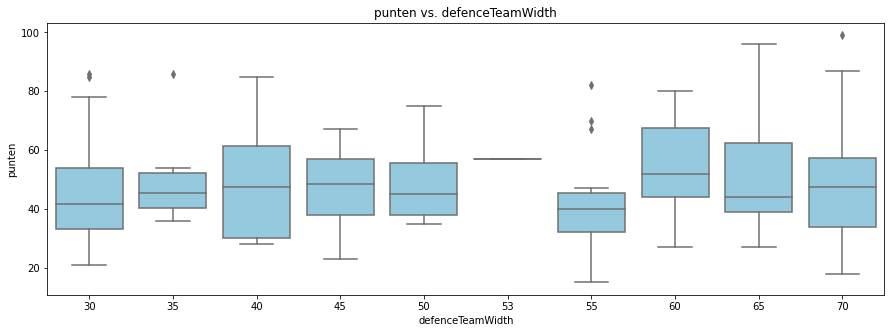

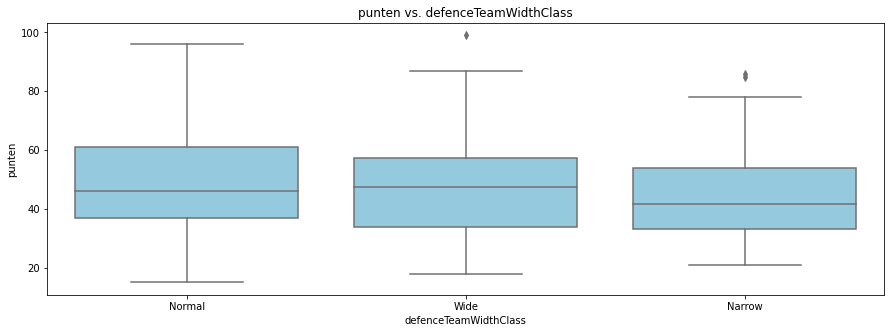

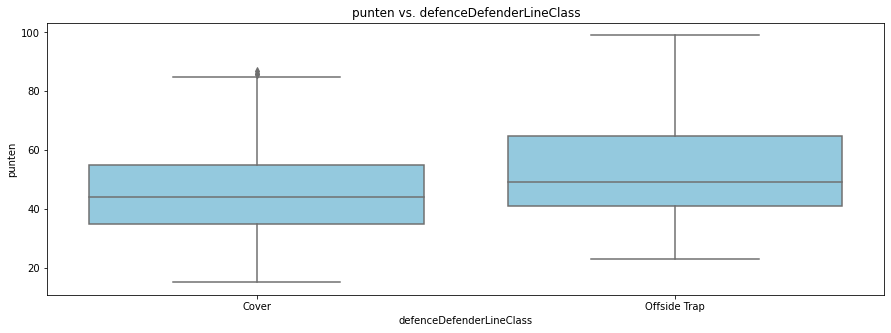

In [34]:
boxplots(tap, 'punten')

Zo als te zien is uit de verschillende plots, valt er niet op 1 statistiek te drukken. Verschillende statistieken tonen betere resultaten op verschillende getallen, van zowel hoog, middel en laag. Dit laat zien dat de correlatie misschien niet hoog is wegens de brede spreiding van statistieken. De teameigenschappen zouden verder onderzocht moeten worden om goed te kunnen vertellen welke combinaties in statistiek beter werken dan anderen.

[Terug naar het begin](#begin)

# Sprint 4 <a name='spr4'></a>

## Eigen functie: Statistieken per speler <a name='spelerstat'></a>

ajdlasgbhpadfg

In [ ]:
def spelers():
    drop = ['id_x', 'id_y', 'birthday', 'height', 'weight']
    spelers = player.merge(player_attributes, on= ['player_api_id', 'player_fifa_api_id'])
    spelers = spelers.drop(drop, axis= 1)
    spelers = spelers.groupby('player_name').mean().round(2)
    df = spelers.copy()
    df = df.drop(['player_api_id', 'player_fifa_api_id', 'overall_rating', 'potential'], axis= 1)
    spelers['Gem_rating'] = df.mean(axis= 1).round(2)
    return spelers

spelers()

[Terug naar het begin](#begin)

## Eigen functies: Speler ratings <a name='ratingspeler'></a>

uyhgapgvubaeprigvbopazvr

In [ ]:
#Aanmaken rp (rating_points) voor het gebruiken van visualisaties. De niet benodigde informatie (X, Y coördinaten en Betting stats) wordt weggehaald
rp = match.iloc[:, :-38]
rp = rp.drop(rp.columns[11:55], axis= 1)

#Er wordt een tijdelijke dictionary gemaakt om te mappen
team_name_dict = dict(zip(team['team_api_id'], team['team_long_name']))

#Gebruik van map om de kolommen aan te maken, vervolgens is .insert gebruikt om de kolommen op een goede plek te zetten
rp['home_team'] = rp['home_team_api_id'].map(team_name_dict)
rp['away_team'] = rp['away_team_api_id'].map(team_name_dict)

rp.insert(7, 'home_team', rp.pop('home_team'))
rp.insert(9, 'away_team', rp.pop('away_team'))

display(rp)

syjydfgtjtnctfbyidcxygkl

In [ ]:
def rating_punten(categorie):
    """
    Voegt de gemiddelde rating van een speler voor een specifieke categorie toe aan een dataframe met voetbalwedstrijden.
    
    Parameters:
    ----------------
    categorie : str
        De categorie van de speler rating die moet worden toegevoegd aan het dataframe.

    Returns:
    -----------------
    rp_c : pandas.DataFrame 
        Een dataframe met de rating van de spelers. De toegevoegde kolommen bevatten de categorie plus 
        het kenmerk 'hp' of 'ap' voor de thuis- of uitploeg. Als de rating niet gevonden kan worden voor een speler, 
        wordt er NaN toegevoegd.
    """
    
    #Eerst worden er een dataframe en 2 lijsten aangemaakt voor gebruik binnen de functie
    df = player_attributes.groupby(by=['season', 'player_api_id'])[categorie].mean().reset_index().sort_values(['season', 'player_api_id'])
    
    match_players =  ['home_player_' + str(pl_num) for pl_num in range(1,12)] + \
                                ['away_player_' + str(pl_num) for pl_num in range(1,12)]
    
    match_players_rating = [categorie + '_hp' + s.replace('home_player', '') if i < 11 
                                    else categorie + '_ap' + s.replace('away_player', '') 
                                    for i, s in enumerate(match_players)]

    #Aanmaken van een dictionary om over te loopen
    rating_dict = {}
    for season in df["season"].unique():
        dftemp = df.loc[df["season"] == season]
        rating_dict[season] = dict(zip(dftemp['player_api_id'], dftemp[categorie]))
        
    #Voor elke rij in de kolommen zoekt de lc de rating op in rating_map. Als de rating niet gevonden is returned hij NaN.
    for kol_rating, kol_players in zip(match_players_rating, match_players):
        rp[kol_rating] = [rating_dict[season].get(p, np.nan) for season, p in zip(rp['season'], rp[kol_players])]
    
    #Aanmaken van kolommen met de punten die per wedstrijd zijn verkregen
    rp['home_points'] = [3 if h > a else 1 if h == a else 0 for h, a in zip(rp['home_team_goal'], rp['away_team_goal'])]
    rp['away_points'] = [3 if a > h else 1 if a == h else 0 for h, a in zip(rp['home_team_goal'], rp['away_team_goal'])]

    return rp

[Terug naar het begin](#begin)

### df_gemiddelde

In [ ]:
def df_gemiddelde(df, categorie, seizoen = '2009/2010', league = 13274):
    """
    Maakt een dataframe met daarin statistieken over een specifiek onderwerp, per seizoen van een gegeven league.
    
    Parameters:
    ------------------
    df : pandas.DataFrame
        Het dataframe dat gemaakt is met rating_punten. Het kan ook een ander dataframe zijn, maar 
    
    categorie : str
        De categorie van de speler rating die moet worden gebruikt in het dataframe.
    
    seizoen : str
        Het seizoen waarin de data zich bevind
    
    league : int
        De league_id van de league die bekeken gaat worden
        
    Returns:
    --------------
    df_teams : pandas.DataFrame
        Een dataframe met de gemiddelde rating van alle posities, de gemiddelde rating per team, het aantal wedstrijden,
        het totaal aantal punten behaald en het gemiddeld aantal punten per wedstrijd. Het vershil tussen de ratings van het
        uit en thuis spelen is aangegeven met 'ap' of 'hp'.
    
    """
    
    #dataframe filteren op seizoen en league ID
    temp = df[(df['season'] == seizoen) & (df['league_id'] == league)]

    #lijst aanmaken voor de kolommen met de ratings
    kolommen = [categorie + '_hp_' + str(pl_num) for pl_num in range(1,12)] + \
                         [categorie + '_ap_' + str(pl_num) for pl_num in range(1,12)]

    #aanmaken van home en away df met daarin de juiste ratings
    df_home = temp.groupby('home_team')[kolommen[0 : 11]].mean().reset_index()
    df_away = temp.groupby('away_team')[kolommen[11 : 22]].mean().reset_index()

    #mergen om zowel home als away team in dezelfde dataframe te krijgen
    df_teams = pd.merge(df_home, df_away, left_on = 'home_team', right_on = 'away_team') \
                            .drop('away_team', axis = 1).rename(columns={'home_team' : 'Team'})

    #gemiddelde berekenen van alle ratings
    df_teams[f'gem_{categorie}'] = df_teams[[k for k in kolommen]].mean(axis=1)

    #berekenen van aantal wedstrijden en behaalde punten voor thuis en uit
    dph = temp.groupby('home_team')['home_points'].agg(totaal_punten='sum', wedstrijden='size').reset_index()
    dpa = temp.groupby('away_team')['away_points'].agg(totaal_punten='sum', wedstrijden='size').reset_index()
    
    #Toevoegen aantal wedstrijden, aantal punten en gem punten
    df_teams['wedstrijden'] = dph['wedstrijden'] + dpa['wedstrijden']
    df_teams['totaal_punten'] = dph['totaal_punten'] + dpa['totaal_punten']
    df_teams['gem_punten'] = df_teams['totaal_punten'] / df_teams['wedstrijden']
    
    return df_teams

[Terug naar het begin](#begin)

## Het toepassen van de functies

lxftghjnbfdgbngidzrtfbglszdrgbl

In [ ]:
df = add_player_rating('overall_rating')
df

[Terug naar het begin](#begin)